# Observations per user in the CNCs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


In [3]:
import pandas as pd

# config
cities_years = {
    'London': [2018, 2019, 2020],
    'Los_Angeles': [2018, 2019, 2020],
    'San_Francisco': [2018, 2019, 2020]
}

In [13]:
path = 'C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\CNC_London_2018'

In [4]:
# import datasets
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []

for city, years in cities_years.items():
    for year in years:
        print("Loading: ", city, year)
        df = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\CNC_{}_{}.csv'.format(city, year))
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['London'][2018].head()

Loading:  London 2018
Loading:  London 2019
Loading:  London 2020
Loading:  Los_Angeles 2018


C:\Users\User\AppData\Local\Temp\ipykernel_23220\2419813668.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\CNC_{}_{}.csv'.format(city, year))


Loading:  Los_Angeles 2019


C:\Users\User\AppData\Local\Temp\ipykernel_23220\2419813668.py:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\User\\Downloads\\citizen_science_inaturalist-main\\data\\CNC_{}_{}.csv'.format(city, year))


Loading:  Los_Angeles 2020
Loading:  San_Francisco 2018
Loading:  San_Francisco 2019
Loading:  San_Francisco 2020


,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27,2018-04-27 07:52:34 UTC,UTC,159021,muki,2018-04-27 07:06:17 UTC,2018-04-27 09:26:56 UTC,research,...,NaN,NaN,False,gps,gps,lesser celandine,Ficaria verna,lesser celandine,Plantae,204321.0
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27,2018-04-27 07:39:41 UTC,London,664459,lucyrobinsonnhm,2018-04-27 08:02:52 UTC,2019-01-29 21:16:34 UTC,research,...,NaN,open,False,gps,gps,Pigeon biset domestique,Columba livia domestica,Feral Pigeon,Aves,122767.0
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27,2018-04-27 06:34:31 UTC,Amsterdam,908315,tess26,2018-04-27 08:42:01 UTC,2018-04-27 11:01:49 UTC,casual,...,NaN,NaN,False,NaN,NaN,NaN,Hyacinthoides hispanica,Spanish Bluebell,Plantae,57635.0
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27,2018-04-27 07:54:35 UTC,Amsterdam,796473,bryonycross,2018-04-27 08:54:45 UTC,2018-04-27 20:23:41 UTC,research,...,NaN,NaN,False,NaN,NaN,Green Alkanet,Pentaglottis sempervirens,Green Alkanet,Plantae,166466.0
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27,2018-04-27 07:42:21 UTC,London,664459,lucyrobinsonnhm,2018-04-27 10:09:55 UTC,2018-04-27 15:37:31 UTC,research,...,NaN,NaN,False,gps,gps,London Plane,Platanus × hispanica,London Plane,Plantae,552449.0


In [6]:
df.shape

(31799, 34)

 Calculate total number of observations in all CNCs

In [7]:
# total count of observations in all CNCs
all_obs = len(dfall)
print('Sum of observations of all CNCs:', all_obs)

Sum of observations of all CNCs: 201928


In [8]:
# count of different users who participated in the CNCs (counting each user only once, even if they participated in more than one challenge)
users_unique = len(dfall['user_id'].value_counts())
print('Total number of participants over all CNCs:', users_unique)

Total number of participants over all CNCs: 10052


In [9]:
# count of total participants of the CNCs (counting users as new users for each CNC, if they participated in more than one)
users_total = 0
# dataframe for observations per user over all CNCs (counting users as new users for each CNC, if they participated in more than one)
dfall2 = []

for city, years in cities_years.items():
    for year in years:
        print(city, year, ':')
        # user count over all CNCS (users who participated in several CNCs are counted as new users for each event)
        df_obs_per_user = dfs[city][year]['user_id'].value_counts()
        print('user count:', len(df_obs_per_user))
        users_total += len(df_obs_per_user)
        df_obs_per_user = df_obs_per_user.rename_axis('user_id').reset_index(name='obs_count')
        print(df_obs_per_user)
        dfall2.append(df_obs_per_user)

London 2018 :
user count: 109
     user_id  obs_count
0     353381        567
1     664459        150
2     911337        125
3     883351         97
4     781146         95
..       ...        ...
104   910982          1
105   915088          1
106   921599          1
107   921568          1
108  2072865          1

[109 rows x 2 columns]
London 2019 :
user count: 281
     user_id  obs_count
0     353381       1085
1    1358449        219
2     923147        202
3     894051        163
4     781146        145
..       ...        ...
276  1674540          1
277  1685614          1
278  1615211          1
279  1686017          1
280  3110080          1

[281 rows x 2 columns]
London 2020 :
user count: 561
     user_id  obs_count
0    1488476        355
1    2782355        299
2     353381        274
3    1624432        185
4     908569        183
..       ...        ...
556  1839196          1
557  2808650          1
558  1706831          1
559  1998857          1
560  2763644          

In [10]:
# users who participated in more than one challenge
print(users_total - users_unique)

1570


In [11]:
print('total user count:', users_total)
# observations per user, summed up over all CNCs

# Histogram of observations per user for all CNCs

# make log plot from histogram

total user count: 11622


In [12]:
dfall2 = pd.concat(dfall2)
dfall2.shape

(11622, 2)

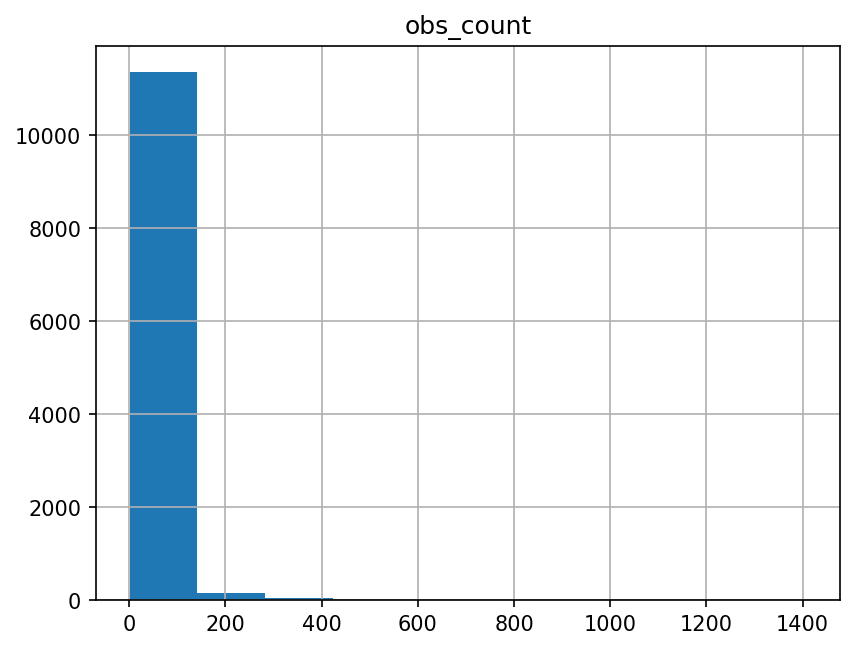

In [13]:
import matplotlib as plt

ax = dfall2.hist(column='obs_count')

D:\Anaconda\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

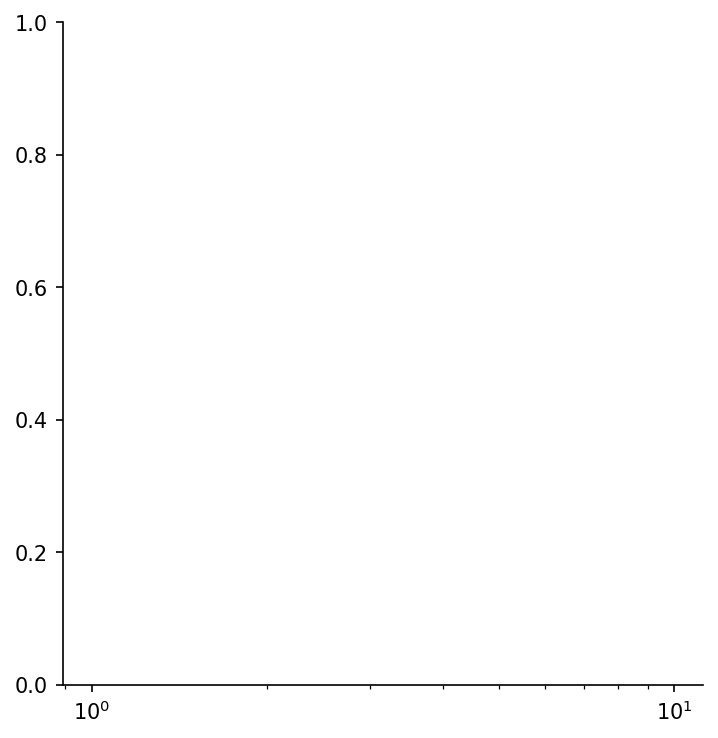

In [14]:
import seaborn as sns

ax = sns.displot(data=dfall2, x="obs_count", log_scale=True)
ax.set(xlabel='observation count', ylabel='count')

In [ ]:
import seaborn as sns

ax = sns.displot(data=dfall2, x="obs_count", log_scale=True)
ax.set(xlabel='observation count', ylabel='frequency')

# Figure B 

In [ ]:
fig = plt.figure(figsize=(4,2.8))
user_counts = dfall.groupby(by='user_id').count()['id']
cum_sum = np.cumsum(user_counts.sort_values())
n_users = len(cum_sum)
plt.plot(np.linspace(0,1,n_users), cum_sum/cum_sum.iloc[-1], color='k')
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel("Percentage of users (sorted by contributions)")
plt.ylabel("Percentage of observations")

quintiles = [50, 90, 99]
total_obs = cum_sum.iloc[-1]
for q in quintiles:
    obs = (total_obs - np.percentile(cum_sum, q=q))/total_obs
    print("Top {}% of users contribute {:.0%} of observations".format(100-q, obs))
plt.show()